# Install

pip install ipywidgets

jupyter nbextension enable --py widgetsnbextension

or

jupyter nbextension enable --py --sys-prefix widgetsnbextension

In [1]:
import ipywidgets as widgets
import markdown
from IPython.display import display
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual

# Working

In [2]:
import ipywidgets as wg
from IPython.display import display

name = wg.Text(value='Name', description="Species: ")
month = wg.SelectionSlider(description="Month: ", options=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'all'])
algo = wg.Dropdown(options = ["CTA", "GLM", "RF"], description="Algorithm: ")
threshold = wg.Dropdown(options = ['1', '10', '50'], description="Prediction threshold: ")
display(name, algo, threshold, month)

Text(value='Name', description='Species: ')

Dropdown(description='Algorithm: ', options=('CTA', 'GLM', 'RF'), value='CTA')

Dropdown(description='Prediction threshold: ', options=('1', '10', '50'), value='1')

SelectionSlider(description='Month: ', options=('jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'all'), value='jan')

SDM: Papilio_glaucus using RF algorithm with threshold 10 displaying month: dec


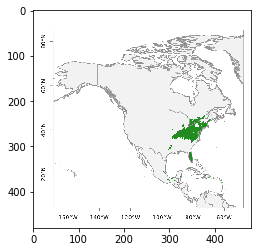

In [8]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
print("SDM: " + name.value + " using " + algo.value + " algorithm with threshold " + threshold.value + " displaying month: " + str(month.value))
picture = name.value + "-" + month.value + "-" + algo.value + "-" + threshold.value + "-prediction-" + algo.value + "-" + threshold.value + ".png"

img = Image.open(name.value+"/"+picture)
plt.figure()
plt.imshow(img)
plt.show(img)

In [82]:
a = wg.FloatText()
b = wg.FloatSlider()
display(a, b)
mylink = wg.jslink((a, 'value'), (b, 'value'))

FloatText(value=0.0)

FloatSlider(value=0.0)

In [83]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
def myPlot(c):
    x = np.linspace(-5,5,20)
    y = c * x**2
    plt.plot(x,y,'r--')
    plt.ylabel('y(x)')
    plt.xlabel('x')
    plt.ylim([0,80])
    plt.xlim([-5,5])


In [84]:
c_slide = wg.FloatSlider(value=1.0,min=0,max=3.0,step=0.1)
wg.interact(myPlot, c=c_slide)

interactive(children=(FloatSlider(value=1.0, description='c', max=3.0), Output()), _dom_classes=('widget-interact',))

<function __main__.myPlot>

In [85]:
import time
progress = wg.IntProgress(description='Loading: ')
progress.orientation='horizontal'
display(progress)
for i in range(100):
    progress.value = i
    time.sleep(0.1)

IntProgress(value=0, description='Loading: ')

In [ ]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
%matplotlib inline

species = input("Enter a species here: ")
monthz = ["oct", "nov", "dec"]
algorithmz = ["CTA", "RF"]
predictionz = ["1", "10"]

path = ""
images = []

for month in monthz:
    for algo in algorithmz:
        for prediction in predictionz:
            
            picture = species + "-" + month + "-" + algo + "-" + prediction + "-prediction-" + algo + "-" + prediction + ".png"
            direc = species
            img = Image.open(species+"/"+picture)
            images.append(img)
            
            for image in images:        
                plt.figure()
                plt.imshow(image)
                plt.show(image)



#plt.figure(figsize=(20,10))
#columns = 5
#for i, image in enumerate(images):
#    plt.subplot(len(images) / columns + 1, columns, i + 1)
#    plt.imshow(image)


# Creating GIF

In [14]:
import glob, os
import imageio

#Step forward a directory
os.chdir(name.value)
filenames = []
#Find all files that match this pattern and append them
for file in glob.glob(name.value + '-' + '???' + '-' + algo.value +'-' +'??' + '-prediction-' + algo.value + '-' + '??.png'):
    filenames.append(file)
print(filenames)
#Step back a directory
os.chdir('..')

#Build GIF of images based on saved filenames
images = []
for filename in filenames:
    images.append(imageio.imread(name.value + "/" + filename))
if not os.path.exists('gifs/'):
    os.makedirs('gifs/')
imageio.mimsave('gifs/' + name.value + '-' + algo.value + '.gif', images, duration=0.3)

['Papilio_glaucus-dec-RF-10-prediction-RF-10.png', 'Papilio_glaucus-nov-RF-10-prediction-RF-10.png', 'Papilio_glaucus-oct-RF-10-prediction-RF-10.png']
